# An intro to using Python in Jupyter notebooks for data science
## Common tasks and grammar of data manipulation

## Overview

**Notebook purpose**: This notebook will illustrate some data manipulation tasks, and show how the grammar of data manipulation \[select, filter, mutate, summarise, arrange\] is achieved through Pandas and Python.  Keep in mind that there are *many* ways to achieve a certain grammar operation, and the syntax in this notebook absolutely does not demonstrate the exhaustive set.  

**Data**: In this notebook, we demonstrate a data science task on the planets dataset from Seaborn using Pandas.  Pandas is a popular tool in Python for analyzing data. 

**Sources**:  This notebook was heavily influenced by the Python Data Science Handbook by Jake VanderPlas.  Some comments within this notebook are direct quotes from his notebooks.

Similarly to R, we start our processing by importing the packages that we need.  We will use pandas for our processing, which provides functionality for manipulating tabular data and other data types.

In [1]:
#import statements
import pandas as pd
import numpy as np
import seaborn as sns

## Loading and viewing the data

In [2]:
#Load data
planets = sns.load_dataset('planets')

Here, we load the data directly from `seaborn`.  However data is regularly distributed in the form of .csv files.  We look at an example of this below in the section on joins.

In [3]:
# Get a preview of the data
planets.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [4]:
# How large is this data?
print(planets.shape)
planets.size

(1035, 6)


6210

In [5]:
#General info about the data
planets.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
#Abridged version of info
planets.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Columns: 6 entries, method to year
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [7]:
#Stats about the dataset (aggregation)
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [8]:
#Count na values
planets.isnull().sum(skipna=False)

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [9]:
#Column names
planets.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [10]:
#Get the value counts for the categorical data
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [11]:
# Look at the value counts for all of the columns: categorical histogram
[planets[x].value_counts() for x in planets.columns if planets[x].dtype=='object']

[Radial Velocity                  553
 Transit                          397
 Imaging                           38
 Microlensing                      23
 Eclipse Timing Variations          9
 Pulsar Timing                      5
 Transit Timing Variations          4
 Orbital Brightness Modulation      3
 Astrometry                         2
 Pulsation Timing Variations        1
 Name: method, dtype: int64]

## Handling missing values

In [12]:
#Simplest approach if datset large enough: drop the missing values
#Note: avoid performing operations on subsets of a data frame
test = planets.dropna(axis=0)
print('# of rows of returned (test) data frame: ', len(test))
print('# of rows of original (df) data frame: ', len(planets))

# of rows of returned (test) data frame:  498
# of rows of original (df) data frame:  1035


#### Filling missing values

This is actually a lot of missing data - about half of the dataset.  Here, you'd also want to look at if there's something in particular that's missing to understand if it will throw off your analysis.  Is it a particular year that is missing?  For demonstration purposes, let's just fill in this value with the mean value (mean inputation).  We can do this using one of the parameters of the `fillna` method.

In [13]:
#fill with the mean
imp_planets = planets.fillna(value=planets.mean())

In [15]:
#check to see if there are any null values
imp_planets.isnull().sum(skipna=False)

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

**Question.**  Take a look at the parameter list for `.fillna`.  You can do this by typing `pd.DataFrame.fillna?`  There's a parameter there called `inplace`.  What do you think that this does?  Do you think you should use it?  How does this compare to R?

#### Dropping missing values
We could also just drop the missing data.  We can do that using the `dropna` method.  Since we'll be dropping rows, this will actually leave holes in our index.  We could leave the index as such, or we could also renumber the index.  We can reindex using the `reset_index` method, where the `drop` parameter prevents the old index from being added to the dataframe.

In [16]:
drop_planets = planets.dropna(axis=0)
drop_planets.reset_index(inplace=True, drop=True)
print('# of rows of original (df) data frame: ', len(drop_planets))

# of rows of original (df) data frame:  498


In [17]:
#check to see if there are any null values
drop_planets.isnull().sum(skipna=False)

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

## Select: choose data from the dataframe
We've already learned how to select columns from the data frame!

**Question.** What operators can we use in order to select columns from the dataframe?

In [18]:
#Obtain the method column
imp_planets['method']

0       Radial Velocity
1       Radial Velocity
2       Radial Velocity
3       Radial Velocity
4       Radial Velocity
             ...       
1030            Transit
1031            Transit
1032            Transit
1033            Transit
1034            Transit
Name: method, Length: 1035, dtype: object

#### Try it yourself!
1. Get everything other than the orbital period column and display the first 10 rows
2. Use .iloc to retrieve the last 2 columns
3. Use .loc to get the `orbital_period` through `distance` slices.  Use .iloc to do the same.

In [19]:
#Answer to 1
imp_planets.loc[:, imp_planets.columns != 'orbital_period'].head(10)

,method,number,mass,distance,year
0,Radial Velocity,1,7.100000,77.40,2006
1,Radial Velocity,1,2.210000,56.95,2008
2,Radial Velocity,1,2.600000,19.84,2011
3,Radial Velocity,1,19.400000,110.62,2007
4,Radial Velocity,1,10.500000,119.47,2009
5,Radial Velocity,1,4.800000,76.39,2008
6,Radial Velocity,1,4.640000,18.15,2002
7,Radial Velocity,1,2.638161,21.41,1996
8,Radial Velocity,1,10.300000,73.10,2008
9,Radial Velocity,2,1.990000,74.79,2010


In [20]:
#Answer to 2
imp_planets.iloc[:, -2:]
imp_planets.iloc[:, 4:]

,distance,year
0,77.40,2006
1,56.95,2008
2,19.84,2011
3,110.62,2007
4,119.47,2009
...,...,...
1030,172.00,2006
1031,148.00,2007
1032,174.00,2007
1033,293.00,2008


In [21]:
#Answer to 3
imp_planets.loc[:, 'orbital_period':'distance']
imp_planets.iloc[:, 2:5]

,orbital_period,mass,distance
0,269.300000,7.100000,77.40
1,874.774000,2.210000,56.95
2,763.000000,2.600000,19.84
3,326.030000,19.400000,110.62
4,516.220000,10.500000,119.47
...,...,...,...
1030,3.941507,2.638161,172.00
1031,2.615864,2.638161,148.00
1032,3.191524,2.638161,174.00
1033,4.125083,2.638161,293.00


## Filter: choose rows of data based on some criteria

We've already learned how to filter rows based on a certain criteria!

**Question.**  What methods do we have to filter rows?

In [22]:
# What entries have mass > 10?
imp_planets.loc[imp_planets['mass']>10, :]
imp_planets.query('mass > 10')

,method,number,orbital_period,mass,distance,year
3,Radial Velocity,1,326.030000,19.40,110.620000,2007
4,Radial Velocity,1,516.220000,10.50,119.470000,2009
8,Radial Velocity,1,993.300000,10.30,73.100000,2008
63,Radial Velocity,1,305.500000,20.60,92.510000,2013
77,Radial Velocity,1,714.300000,10.60,264.069282,2007
85,Radial Velocity,2,379.630000,21.42,264.069282,2009
86,Radial Velocity,2,621.990000,12.47,264.069282,2009
161,Radial Velocity,2,428.500000,15.20,214.000000,2009
227,Radial Velocity,1,1634.000000,14.20,38.260000,2009
245,Radial Velocity,1,471.600000,14.00,300.300000,2005


In [23]:
# For the entries with orbital periods > 1000, what years were they discovered?
imp_planets.query('orbital_period > 1000')['year']

6       2002
13      1996
14      2001
15      2009
19      2002
        ... 
950     2010
957     2008
958     2007
1027    2011
1029    2012
Name: year, Length: 208, dtype: int64

## Mutate: Change or create new columns of data
We can do this using our known select/filter commands!

In [24]:
# Create a new decade column using dictionary-like indexing
imp_planets['decade'] = 10*(imp_planets['year']//10)
imp_planets.head()

,method,number,orbital_period,mass,distance,year,decade
0,Radial Velocity,1,269.300,7.10,77.40,2006,2000
1,Radial Velocity,1,874.774,2.21,56.95,2008,2000
2,Radial Velocity,1,763.000,2.60,19.84,2011,2010
3,Radial Velocity,1,326.030,19.40,110.62,2007,2000
4,Radial Velocity,1,516.220,10.50,119.47,2009,2000


In [25]:
#Create a new column orbital_yr (orbital_period is currently assumed to be days), which expresses the orbital period in earth years.
imp_planets['orbital_yr'] = imp_planets['orbital_period']/365

### The assign method
You can use dynamically created columns using `assign` to create other columns for `dplyr`-like piping processing in Pandas 0.23.0. You can then use `assign`ed columns in later processing steps.  You will need to use a lambda function in order to achieve this.  It's an on-the-fly simple function that allows you to do computation.  Let's see how we could do this below!

We can also use `drop` to drop columns that we don't want.  Let's see how below.

In [26]:
#drop columns we just created
imp_planets = imp_planets.drop(labels=['decade', 'orbital_yr'], axis=1)
imp_planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100000,77.40,2006
1,Radial Velocity,1,874.774000,2.210000,56.95,2008
2,Radial Velocity,1,763.000000,2.600000,19.84,2011
3,Radial Velocity,1,326.030000,19.400000,110.62,2007
4,Radial Velocity,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,2.638161,172.00,2006
1031,Transit,1,2.615864,2.638161,148.00,2007
1032,Transit,1,3.191524,2.638161,174.00,2007
1033,Transit,1,4.125083,2.638161,293.00,2008


In [27]:
# Use assign to create the decade column above.
imp_planets = imp_planets.assign(decade = 10*(imp_planets['year']//10))

In [28]:
# Let's drop again to see the effect of chaining
imp_planets.drop(labels=['decade'], axis=1, inplace=True)

In [29]:
# Now, let's try chaining to make a decade and a century column
imp_planets.assign(decade = 10*(imp_planets['year']//10),
                   century = lambda y: 100*(y['decade']//100))

,method,number,orbital_period,mass,distance,year,decade,century
0,Radial Velocity,1,269.300000,7.100000,77.40,2006,2000,2000
1,Radial Velocity,1,874.774000,2.210000,56.95,2008,2000,2000
2,Radial Velocity,1,763.000000,2.600000,19.84,2011,2010,2000
3,Radial Velocity,1,326.030000,19.400000,110.62,2007,2000,2000
4,Radial Velocity,1,516.220000,10.500000,119.47,2009,2000,2000
...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,2.638161,172.00,2006,2000,2000
1031,Transit,1,2.615864,2.638161,148.00,2007,2000,2000
1032,Transit,1,3.191524,2.638161,174.00,2007,2000,2000
1033,Transit,1,4.125083,2.638161,293.00,2008,2000,2000


**Try it yourself!**
1. Mutate a new column called `mass_rel`, which will calculate a planet's mass relative to earth's.  Assuming the scale of these values, you can assume the mass of the earth to be 5.97.  Try this using assign.
2. Mutate a new column called `orbital_yr` using `assign`.  Using this new column, create a new column `orbital_weeks`, which converts `orbital_yr` to weeks.  (**Hint**:  There are 52 weeks in a year).
3. Mutate two columns using assign.  The first will be called `x10`, which will multiply the `number` column by 10.  The second will be `dist_mi`, which will convert `distance` from astronomical units to miles.  Use the multiplier 93 for simplicity.

In [30]:
#Answer to 1
imp_planets['mass_rel'] = imp_planets['mass']/5.97
imp_planets = imp_planets.assign(mass_rel = imp_planets['mass']/5.97)
imp_planets

,method,number,orbital_period,mass,distance,year,mass_rel
0,Radial Velocity,1,269.300000,7.100000,77.40,2006,1.189280
1,Radial Velocity,1,874.774000,2.210000,56.95,2008,0.370184
2,Radial Velocity,1,763.000000,2.600000,19.84,2011,0.435511
3,Radial Velocity,1,326.030000,19.400000,110.62,2007,3.249581
4,Radial Velocity,1,516.220000,10.500000,119.47,2009,1.758794
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,2.638161,172.00,2006,0.441903
1031,Transit,1,2.615864,2.638161,148.00,2007,0.441903
1032,Transit,1,3.191524,2.638161,174.00,2007,0.441903
1033,Transit,1,4.125083,2.638161,293.00,2008,0.441903


In [31]:
#Answer to 2
imp_planets = imp_planets.assign(orbital_yr = imp_planets['orbital_period']/365,
                                 orbital_weeks = lambda x: x['orbital_yr']*52)
imp_planets

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks
0,Radial Velocity,1,269.300000,7.100000,77.40,2006,1.189280,0.737808,38.366027
1,Radial Velocity,1,874.774000,2.210000,56.95,2008,0.370184,2.396641,124.625337
2,Radial Velocity,1,763.000000,2.600000,19.84,2011,0.435511,2.090411,108.701370
3,Radial Velocity,1,326.030000,19.400000,110.62,2007,3.249581,0.893233,46.448110
4,Radial Velocity,1,516.220000,10.500000,119.47,2009,1.758794,1.414301,73.543671
...,...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,2.638161,172.00,2006,0.441903,0.010799,0.561530
1031,Transit,1,2.615864,2.638161,148.00,2007,0.441903,0.007167,0.372671
1032,Transit,1,3.191524,2.638161,174.00,2007,0.441903,0.008744,0.454683
1033,Transit,1,4.125083,2.638161,293.00,2008,0.441903,0.011302,0.587683


In [32]:
#Answer to 3
imp_planets = imp_planets.assign(x10 = imp_planets['number']*10,
                                 dist_mi = imp_planets['distance']*93)
imp_planets

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi
0,Radial Velocity,1,269.300000,7.100000,77.40,2006,1.189280,0.737808,38.366027,10,7198.20
1,Radial Velocity,1,874.774000,2.210000,56.95,2008,0.370184,2.396641,124.625337,10,5296.35
2,Radial Velocity,1,763.000000,2.600000,19.84,2011,0.435511,2.090411,108.701370,10,1845.12
3,Radial Velocity,1,326.030000,19.400000,110.62,2007,3.249581,0.893233,46.448110,10,10287.66
4,Radial Velocity,1,516.220000,10.500000,119.47,2009,1.758794,1.414301,73.543671,10,11110.71
...,...,...,...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,2.638161,172.00,2006,0.441903,0.010799,0.561530,10,15996.00
1031,Transit,1,2.615864,2.638161,148.00,2007,0.441903,0.007167,0.372671,10,13764.00
1032,Transit,1,3.191524,2.638161,174.00,2007,0.441903,0.008744,0.454683,10,16182.00
1033,Transit,1,4.125083,2.638161,293.00,2008,0.441903,0.011302,0.587683,10,27249.00


## Putting things together: transform and apply
The `transform` and `apply` methods work on the specified elements of a Series or DataFrame.  A transformation can return some transformed version of the full data to recombine.  For such a transformation, the output is the same shape as the input.

The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

In [33]:
# Create a new column, 'mass_std' which normalizes the the mass of the planets
imp_planets['mass_std'] = imp_planets['mass'].transform(lambda x: ((x-x.mean())/x.std()).round(2))
imp_planets

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std
0,Radial Velocity,1,269.300000,7.100000,77.40,2006,1.189280,0.737808,38.366027,10,7198.20,1.66
1,Radial Velocity,1,874.774000,2.210000,56.95,2008,0.370184,2.396641,124.625337,10,5296.35,-0.16
2,Radial Velocity,1,763.000000,2.600000,19.84,2011,0.435511,2.090411,108.701370,10,1845.12,-0.01
3,Radial Velocity,1,326.030000,19.400000,110.62,2007,3.249581,0.893233,46.448110,10,10287.66,6.24
4,Radial Velocity,1,516.220000,10.500000,119.47,2009,1.758794,1.414301,73.543671,10,11110.71,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,2.638161,172.00,2006,0.441903,0.010799,0.561530,10,15996.00,-0.00
1031,Transit,1,2.615864,2.638161,148.00,2007,0.441903,0.007167,0.372671,10,13764.00,-0.00
1032,Transit,1,3.191524,2.638161,174.00,2007,0.441903,0.008744,0.454683,10,16182.00,-0.00
1033,Transit,1,4.125083,2.638161,293.00,2008,0.441903,0.011302,0.587683,10,27249.00,-0.00


In [34]:
#Create a new column method_min which labels everything other than Radial Velocity, Transit, Imaging, and Microlensing as 'Other'
keep_methods = ['Radial Velocity', 'Transit', 'Imaging', 'Microlensing']
imp_planets['method_min'] = imp_planets['method'].transform(lambda x: x if x in keep_methods else 'Other')
imp_planets['method_min'] = imp_planets['method'].apply(lambda x: x if x in keep_methods else 'Other')
imp_planets

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min
0,Radial Velocity,1,269.300000,7.100000,77.40,2006,1.189280,0.737808,38.366027,10,7198.20,1.66,Radial Velocity
1,Radial Velocity,1,874.774000,2.210000,56.95,2008,0.370184,2.396641,124.625337,10,5296.35,-0.16,Radial Velocity
2,Radial Velocity,1,763.000000,2.600000,19.84,2011,0.435511,2.090411,108.701370,10,1845.12,-0.01,Radial Velocity
3,Radial Velocity,1,326.030000,19.400000,110.62,2007,3.249581,0.893233,46.448110,10,10287.66,6.24,Radial Velocity
4,Radial Velocity,1,516.220000,10.500000,119.47,2009,1.758794,1.414301,73.543671,10,11110.71,2.93,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,2.638161,172.00,2006,0.441903,0.010799,0.561530,10,15996.00,-0.00,Transit
1031,Transit,1,2.615864,2.638161,148.00,2007,0.441903,0.007167,0.372671,10,13764.00,-0.00,Transit
1032,Transit,1,3.191524,2.638161,174.00,2007,0.441903,0.008744,0.454683,10,16182.00,-0.00,Transit
1033,Transit,1,4.125083,2.638161,293.00,2008,0.441903,0.011302,0.587683,10,27249.00,-0.00,Transit


In [37]:
#check to see if things worked how you expected
imp_planets.query('method_min=="Other"')

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min
32,Eclipse Timing Variations,1,10220.000000,6.050000,264.069282,2009,1.013400,28.000000,1456.000000,10,24558.443243,1.27,Other
37,Eclipse Timing Variations,2,5767.000000,2.638161,130.720000,2008,0.441903,15.800000,821.600000,20,12156.960000,-0.00,Other
38,Eclipse Timing Variations,2,3321.000000,2.638161,130.720000,2008,0.441903,9.098630,473.128767,20,12156.960000,-0.00,Other
39,Eclipse Timing Variations,2,5573.550000,2.638161,500.000000,2010,0.441903,15.270000,794.040000,20,46500.000000,-0.00,Other
40,Eclipse Timing Variations,2,2883.500000,2.638161,500.000000,2010,0.441903,7.900000,410.800000,20,46500.000000,-0.00,Other
41,Eclipse Timing Variations,1,2900.000000,2.638161,264.069282,2011,0.441903,7.945205,413.150685,10,24558.443243,-0.00,Other
42,Eclipse Timing Variations,1,4343.500000,4.200000,264.069282,2012,0.703518,11.900000,618.800000,10,24558.443243,0.58,Other
43,Eclipse Timing Variations,2,5840.000000,2.638161,264.069282,2011,0.441903,16.000000,832.000000,20,24558.443243,-0.00,Other
44,Eclipse Timing Variations,2,1916.250000,2.638161,264.069282,2011,0.441903,5.250000,273.000000,20,24558.443243,-0.00,Other
113,Astrometry,1,246.360000,2.638161,20.770000,2013,0.441903,0.674959,35.097863,10,1931.610000,-0.00,Other


## Groupby and summarize: group items by some desired similarity
As with R, groupby alone doesn't do much; however, combined with summarizing functionality, it can be very powerful.  Recall that summarizing functions reduce the dimensionality of the data down to one or more values.  Let's see how this works in Python.

In [38]:
#How many planets are there for each method_min type?
imp_planets.groupby('method_min').count()

#We can also return a particular column
imp_planets.groupby('method_min')['method_min'].count()

method_min
Imaging             38
Microlensing        23
Other               24
Radial Velocity    553
Transit            397
Name: method_min, dtype: int64

In [39]:
#What is the mean distance for all of the planet systems (given by the `number` column)
imp_planets.groupby('number')['distance'].mean()

number
1    287.929666
2    260.178678
3    160.447093
4    108.983481
5    250.278094
6    168.005000
7    780.000000
Name: distance, dtype: float64

You can also group by multiple keys by passing in a list of keys:

In [40]:
#group by multiple keys
imp_planets.groupby(['method_min', 'number']).median()

orbital_period      mass     distance    year  \
method_min      number                                                  
Imaging         1          2002.917596  2.638161    91.700000  2009.5   
                4         53000.000000  2.638161    39.940000  2008.0   
Microlensing    1          2002.917596  2.638161   264.069282  2010.0   
                2          2002.917596  2.638161  2172.034641  2010.0   
Other           1          1170.000000  2.638161   264.069282  2011.0   
                2          1916.250000  2.638161   500.000000  2011.0   
                3            82.376650  2.638161   264.069282  1993.0   
Radial Velocity 1           438.100000  1.900000    48.795000  2008.0   
                2           356.250000  1.340000    42.600000  2009.0   
                3            90.309000  0.058000    25.870000  2011.0   
                4            66.800000  1.059000    13.470000  2005.0   
                5            44.380000  0.800000    12.530000  2004.0   
                6            44.386500  0.019400    12.830000  2010.5   
Transit         1             3.522540  2.638161   264.069282  2011.0   
                2            13.765320  2.638161   264.069282  2012.0   
                3            11.901617  2.638161   264.069282  2012.0   
                4            13.570800  2.638161   264.069282  2013.0   
                5            12.441700  2.638161   290.000000  2012.0   
                6            27.342050  2.638161   613.000000  2010.0   
                7            91.939130  2.638161   780.000000  2013.0   

                        mass_rel  orbital_yr  orbital_weeks   x10  \
method_min      number                                              
Imaging         1       0.441903    5.487445     285.347164  10.0   
                4       0.441903  145.205479    7550.684932  40.0   
Microlensing    1       0.441903    5.487445     285.347164  10.0   
                2       0.441903    5.487445     285.347164  20.0   
Other           1       0.441903    3.205479     166.684932  10.0   
                2       0.441903    5.250000     273.000000  20.0   
                3       0.441903    0.225689      11.735852  30.0   
Radial Velocity 1       0.318258    1.200274      62.414247  10.0   
                2       0.224456    0.976027      50.753425  20.0   
                3       0.009715    0.247422      12.865940  30.0   
                4       0.177387    0.183014       9.516712  40.0   
                5       0.134003    0.121589       6.322630  50.0   
                6       0.003250    0.121607       6.323556  60.0   
Transit         1       0.441903    0.009651       0.501841  10.0   
                2       0.441903    0.037713       1.961087  20.0   
                3       0.441903    0.032607       1.695573  30.0   
                4       0.441903    0.037180       1.933374  40.0   
                5       0.441903    0.034087       1.772516  50.0   
                6       0.441903    0.074910       3.895306  60.0   
                7       0.441903    0.251888      13.098177  70.0   

                              dist_mi  mass_std  
method_min      number                           
Imaging         1         8528.100000    -0.000  
                4         3714.420000    -0.000  
Microlensing    1        24558.443243    -0.000  
                2       201999.221621    -0.000  
Other           1        24558.443243    -0.000  
                2        46500.000000    -0.000  
                3        24558.443243    -0.000  
Radial Velocity 1         4537.935000    -0.270  
                2         3961.800000    -0.480  
                3         2405.910000    -0.960  
                4         1252.710000    -0.590  
                5         1165.290000    -0.680  
                6         1193.190000    -0.975  
Transit         1        24558.443243    -0.000  
                2        24558.443243    -0.000  
                3        24558.443243    -0.000 

### The `agg` function
You can use the `agg` function most aptly performs the `summarise` functionality.  You can use this function to perform several operations on different rows/columns of the data.  Using `agg`, you can pass in a list of the operations you want to do on the columns using a string, pandas, or numpy function as below:

In [41]:
#Find the max, median, and min of mass and distance
imp_planets.groupby('method_min')[['mass', 'distance']].agg(['min', np.median, max])

mass                         distance              \
                      min    median        max         min      median   
method_min                                                               
Imaging          2.638161  2.638161   2.638161    7.690000   52.215000   
Microlensing     2.638161  2.638161   2.638161  264.069282  264.069282   
Other            2.638161  2.638161   6.050000   14.980000  264.069282   
Radial Velocity  0.003600  1.500000  25.000000    1.350000   42.480000   
Transit          1.470000  2.638161   2.638161   38.000000  264.069282   

                              
                         max  
method_min                    
Imaging           264.069282  
Microlensing     7720.000000  
Other            2119.000000  
Radial Velocity   354.000000  
Transit          8500.000000

You can also apply specific aggregation functions on specific columns.  You can do this by using the column names as keys and the functions (as strings) as values.

In [42]:
# Find the total counts of the numbers column, the mean of the distance column
imp_planets.groupby('method_min')[['number', 'distance']].agg({'number': 'count',
                                                               'distance':'mean'})

,number,distance
method_min,,
Imaging,38,98.719097
Microlensing,23,1950.995681
Other,24,472.459224
Radial Velocity,553,60.437077
Transit,397,453.216010


**Try it yourself!!**
1. How many planets are there for each of the raw `method`s?
2. What is the mean and max orbital period for each method for each planet system (`number` variable)
3. **Bonus**: What are the maximum masses for planets with a distance of >1000 and <1000?

In [43]:
#Answer to 1
imp_planets.groupby('method').count()

,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min
method,,,,,,,,,,,,
Astrometry,2,2,2,2,2,2,2,2,2,2,2,2
Eclipse Timing Variations,9,9,9,9,9,9,9,9,9,9,9,9
Imaging,38,38,38,38,38,38,38,38,38,38,38,38
Microlensing,23,23,23,23,23,23,23,23,23,23,23,23
Orbital Brightness Modulation,3,3,3,3,3,3,3,3,3,3,3,3
Pulsar Timing,5,5,5,5,5,5,5,5,5,5,5,5
Pulsation Timing Variations,1,1,1,1,1,1,1,1,1,1,1,1
Radial Velocity,553,553,553,553,553,553,553,553,553,553,553,553
Transit,397,397,397,397,397,397,397,397,397,397,397,397


In [44]:
#Answer to 2
imp_planets.groupby(['method', 'number'])['orbital_period'].agg(['mean', max])

mean            max
method                        number                             
Astrometry                    1         631.180000    1016.000000
Eclipse Timing Variations     1        5821.166667   10220.000000
                              2        4216.883333    5840.000000
Imaging                       1       34619.079632  730000.000000
                              4       73500.000000  170000.000000
Microlensing                  1        2273.202439    3600.000000
                              2        2732.708798    5100.000000
Orbital Brightness Modulation 1           1.544929       1.544929
                              2           0.291496       0.342887
Pulsar Timing                 1       18262.545353   36525.000000
                              3          63.338433      98.211400
Pulsation Timing Variations   1        1170.000000    1170.000000
Radial Velocity               1         814.143794   17337.500000
                              2         959.022946    9017.800000
                              3         769.421724   14002.000000
                              4         695.769616    4205.800000
                              5        1045.993508    4909.000000
                              6         213.752357    2248.000000
Transit                       1          12.301023     289.862300
                              2          27.589652     303.137000
                              3          22.187586     143.343940
                              4          21.430775      54.320310
                              5          30.584464     267.291000
                              6          40.513600     118.380700
                              7         119.217898     331.600590
Transit Timing Variations     2          79.783500     160.000000
                              3        2002.917596    2002.917596

In [45]:
#Answer to 3
imp_planets.groupby(imp_planets['distance']>1000).max()

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min
distance,,,,,,,,,,,,,
False,Transit Timing Variations,7,730000.000000,25.000000,1000.0,2014,4.187605,2000.000000,104000.000000,70,93000.0,8.32,Transit
True,Transit Timing Variations,3,2002.917596,2.638161,8500.0,2014,0.441903,5.487445,285.347164,30,790500.0,-0.00,Transit


## Arrange: change the ordering of the data

In [46]:
#Sort data according to number
imp_planets.sort_values(by='number')

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min
0,Radial Velocity,1,269.300000,7.100000,77.40,2006,1.189280,0.737808,38.366027,10,7198.20,1.66,Radial Velocity
535,Radial Velocity,1,1290.000000,7.800000,67.02,2009,1.306533,3.534247,183.780822,10,6232.86,1.92,Radial Velocity
536,Radial Velocity,1,297.300000,0.610000,127.55,2007,0.102178,0.814521,42.355068,10,11862.15,-0.75,Radial Velocity
537,Astrometry,1,1016.000000,2.638161,14.98,2010,0.441903,2.783562,144.745205,10,1393.14,-0.00,Other
540,Radial Velocity,1,71.484000,7.030000,46.73,2001,1.177554,0.195847,10.184022,10,4345.89,1.63,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,Transit,7,91.939130,2.638161,780.00,2013,0.441903,0.251888,13.098177,70,72540.00,-0.00,Transit
822,Transit,7,124.914400,2.638161,780.00,2013,0.441903,0.342231,17.796024,70,72540.00,-0.00,Transit
823,Transit,7,210.606970,2.638161,780.00,2013,0.441903,0.577005,30.004281,70,72540.00,-0.00,Transit
824,Transit,7,331.600590,2.638161,780.00,2013,0.441903,0.908495,47.241728,70,72540.00,-0.00,Transit


In [47]:
#Sort data according to number, ascending
imp_planets.sort_values(by='number', ascending=False)

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min
822,Transit,7,124.914400,2.638161,780.00,2013,0.441903,0.342231,17.796024,70,72540.00,-0.00,Transit
821,Transit,7,91.939130,2.638161,780.00,2013,0.441903,0.251888,13.098177,70,72540.00,-0.00,Transit
818,Transit,7,7.008151,2.638161,780.00,2013,0.441903,0.019200,0.998422,70,72540.00,-0.00,Transit
819,Transit,7,8.719375,2.638161,780.00,2013,0.441903,0.023889,1.242212,70,72540.00,-0.00,Transit
824,Transit,7,331.600590,2.638161,780.00,2013,0.441903,0.908495,47.241728,70,72540.00,-0.00,Transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Radial Velocity,1,2890.000000,11.000000,87.87,2011,1.842546,7.917808,411.726027,10,8171.91,3.11,Radial Velocity
422,Radial Velocity,1,3630.000000,9.610000,36.36,2012,1.609715,9.945205,517.150685,10,3381.48,2.59,Radial Velocity
423,Imaging,1,2002.917596,2.638161,91.83,2013,0.441903,5.487445,285.347164,10,8540.19,-0.00,Imaging
424,Radial Velocity,1,48.056000,0.210000,51.26,2005,0.035176,0.131660,6.846334,10,4767.18,-0.90,Radial Velocity


In [48]:
#Sort data according to mass and distance
imp_planets.sort_values(by=['mass', 'distance'])

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min
46,Radial Velocity,1,3.23570,0.00360,1.350000,2012,0.000603,0.008865,0.460976,10,125.550000,-0.98,Radial Velocity
128,Radial Velocity,4,3.14942,0.00600,6.270000,2005,0.001005,0.008629,0.448684,40,583.110000,-0.98,Radial Velocity
263,Radial Velocity,3,40.11400,0.00755,6.060000,2011,0.001265,0.109901,5.714871,30,563.580000,-0.98,Radial Velocity
133,Radial Velocity,6,62.24000,0.00800,6.800000,2013,0.001340,0.170521,8.867068,60,632.400000,-0.98,Radial Velocity
134,Radial Velocity,6,39.02600,0.00800,6.800000,2013,0.001340,0.106921,5.559868,60,632.400000,-0.98,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Radial Velocity,1,326.03000,19.40000,110.620000,2007,3.249581,0.893233,46.448110,10,10287.660000,6.24,Radial Velocity
913,Radial Velocity,1,677.80000,19.80000,264.069282,2007,3.316583,1.856986,96.563288,10,24558.443243,6.39,Radial Velocity
63,Radial Velocity,1,305.50000,20.60000,92.510000,2013,3.450586,0.836986,43.523288,10,8603.430000,6.68,Radial Velocity
85,Radial Velocity,2,379.63000,21.42000,264.069282,2009,3.587940,1.040082,54.084274,20,24558.443243,6.99,Radial Velocity


In [49]:
#Sort data according to mass - ascending and distance - descending
imp_planets.sort_values(by=['mass', 'distance'], ascending=[False, True])

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min
321,Radial Velocity,1,2371.00000,25.00000,37.050000,2008,4.187605,6.495890,337.786301,10,3445.650000,8.32,Radial Velocity
85,Radial Velocity,2,379.63000,21.42000,264.069282,2009,3.587940,1.040082,54.084274,20,24558.443243,6.99,Radial Velocity
63,Radial Velocity,1,305.50000,20.60000,92.510000,2013,3.450586,0.836986,43.523288,10,8603.430000,6.68,Radial Velocity
913,Radial Velocity,1,677.80000,19.80000,264.069282,2007,3.316583,1.856986,96.563288,10,24558.443243,6.39,Radial Velocity
3,Radial Velocity,1,326.03000,19.40000,110.620000,2007,3.249581,0.893233,46.448110,10,10287.660000,6.24,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Radial Velocity,6,62.24000,0.00800,6.800000,2013,0.001340,0.170521,8.867068,60,632.400000,-0.98,Radial Velocity
134,Radial Velocity,6,39.02600,0.00800,6.800000,2013,0.001340,0.106921,5.559868,60,632.400000,-0.98,Radial Velocity
263,Radial Velocity,3,40.11400,0.00755,6.060000,2011,0.001265,0.109901,5.714871,30,563.580000,-0.98,Radial Velocity
128,Radial Velocity,4,3.14942,0.00600,6.270000,2005,0.001005,0.008629,0.448684,40,583.110000,-0.98,Radial Velocity


**Try it yourself!**
1. Sort rows by `year` and `distance`
2. Sort rows by `orbital_weeks` ascending and `dist_mi` descending

In [50]:
#Answer 1
imp_planets.sort_values(by=['year', 'distance'])

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min
441,Radial Velocity,1,83.888000,11.680000,40.570000,1989,1.956449,0.229830,11.951167,10,3773.010000,3.36,Radial Velocity
941,Pulsar Timing,3,25.262000,2.638161,264.069282,1992,0.441903,0.069211,3.598970,30,24558.443243,-0.00,Other
942,Pulsar Timing,3,66.541900,2.638161,264.069282,1992,0.441903,0.182307,9.479942,30,24558.443243,-0.00,Other
943,Pulsar Timing,3,98.211400,2.638161,264.069282,1994,0.441903,0.269072,13.991761,30,24558.443243,-0.00,Other
16,Radial Velocity,1,4.230785,0.472000,15.360000,1995,0.079062,0.011591,0.602742,10,1428.480000,-0.81,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,Radial Velocity,1,5.118000,0.400000,264.069282,2014,0.067002,0.014022,0.729140,10,24558.443243,-0.83,Radial Velocity
916,Radial Velocity,1,121.710000,1.540000,264.069282,2014,0.257956,0.333452,17.339507,10,24558.443243,-0.41,Radial Velocity
194,Transit,1,2.691548,2.638161,322.000000,2014,0.441903,0.007374,0.383453,10,29946.000000,-0.00,Transit
1026,Transit,1,0.925542,2.638161,470.000000,2014,0.441903,0.002536,0.131858,10,43710.000000,-0.00,Transit


In [51]:
#Answer 2
imp_planets.sort_values(by=['year', 'distance'], ascending=[True, False])

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min
441,Radial Velocity,1,83.888000,11.680000,40.570000,1989,1.956449,0.229830,11.951167,10,3773.010000,3.36,Radial Velocity
941,Pulsar Timing,3,25.262000,2.638161,264.069282,1992,0.441903,0.069211,3.598970,30,24558.443243,-0.00,Other
942,Pulsar Timing,3,66.541900,2.638161,264.069282,1992,0.441903,0.182307,9.479942,30,24558.443243,-0.00,Other
943,Pulsar Timing,3,98.211400,2.638161,264.069282,1994,0.441903,0.269072,13.991761,30,24558.443243,-0.00,Other
16,Radial Velocity,1,4.230785,0.472000,15.360000,1995,0.079062,0.011591,0.602742,10,1428.480000,-0.81,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,Radial Velocity,1,5.118000,0.400000,264.069282,2014,0.067002,0.014022,0.729140,10,24558.443243,-0.83,Radial Velocity
916,Radial Velocity,1,121.710000,1.540000,264.069282,2014,0.257956,0.333452,17.339507,10,24558.443243,-0.41,Radial Velocity
650,Transit,1,7.845700,2.638161,222.000000,2014,0.441903,0.021495,1.117744,10,20646.000000,-0.00,Transit
501,Radial Velocity,2,3452.000000,2.580000,68.540000,2014,0.432161,9.457534,491.791781,20,6374.220000,-0.02,Radial Velocity


# Join: Put datasets together based on matching keys

There are many ways to perform joins in python.  One way is through the `merge` method.  The `concat` method is extremely valuable when there are several dataframes to be joined.  An astronomers csv file is provided which contains an astronomer corresponding to many years.  This will be used during the join.

In [54]:
#load the astronomers dataset locally, called `astronomers.csv`
astros = pd.read_csv('astronomers.csv')
astros.head()

,year,astronomer
0,1989,Galileo Galilei
1,1990,Johannes Kepler
2,1991,Nicolaus Copernicus
3,1992,Albert Einstein
4,1993,Isaac Newton


In [55]:
#Perform an inner join on the data using the 'year' column as the key
in_join = pd.merge(imp_planets, astros, how='inner', on='year').sort_values('year')
in_join

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min,astronomer
1031,Radial Velocity,1,83.888000,11.680000,40.570000,1989,1.956449,0.229830,11.951167,10,3773.010000,3.36,Radial Velocity,Galileo Galilei
1032,Pulsar Timing,3,25.262000,2.638161,264.069282,1992,0.441903,0.069211,3.598970,30,24558.443243,-0.00,Other,Albert Einstein
1033,Pulsar Timing,3,66.541900,2.638161,264.069282,1992,0.441903,0.182307,9.479942,30,24558.443243,-0.00,Other,Albert Einstein
1034,Pulsar Timing,3,98.211400,2.638161,264.069282,1994,0.441903,0.269072,13.991761,30,24558.443243,-0.00,Other,Ptolemy
593,Radial Velocity,1,4.230785,0.472000,15.360000,1995,0.079062,0.011591,0.602742,10,1428.480000,-0.81,Radial Velocity,Carl Sagan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Transit,2,15.965400,2.638161,264.069282,2014,0.441903,0.043741,2.274523,20,24558.443243,-0.00,Transit,Margaret Burbidge
1001,Transit,2,179.612000,2.638161,264.069282,2014,0.441903,0.492088,25.588559,20,24558.443243,-0.00,Transit,Margaret Burbidge
1002,Transit,4,6.164860,2.638161,264.069282,2014,0.441903,0.016890,0.878281,40,24558.443243,-0.00,Transit,Margaret Burbidge
1004,Transit,4,23.980200,2.638161,264.069282,2014,0.441903,0.065699,3.416357,40,24558.443243,-0.00,Transit,Margaret Burbidge


In [56]:
#Can also perform an outer join to see if anything was missed
out_join = pd.merge(imp_planets, astros, how='outer', on='year')
out_join

,method,number,orbital_period,mass,distance,year,mass_rel,orbital_yr,orbital_weeks,x10,dist_mi,mass_std,method_min,astronomer
0,Radial Velocity,1.0,269.300000,7.100000,77.400000,2006,1.189280,0.737808,38.366027,10.0,7198.200000,1.66,Radial Velocity,Jocelyn Burnell
1,Imaging,1.0,2002.917596,2.638161,18.390000,2006,0.441903,5.487445,285.347164,10.0,1710.270000,-0.00,Imaging,Jocelyn Burnell
2,Radial Velocity,1.0,594.900000,7.600000,47.530000,2006,1.273032,1.629863,84.752877,10.0,4420.290000,1.85,Radial Velocity,Jocelyn Burnell
3,Imaging,1.0,2002.917596,2.638161,264.069282,2006,0.441903,5.487445,285.347164,10.0,24558.443243,-0.00,Imaging,Jocelyn Burnell
4,Radial Velocity,1.0,1845.000000,0.910000,8.770000,2006,0.152429,5.054795,262.849315,10.0,815.610000,-0.64,Radial Velocity,Jocelyn Burnell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Pulsar Timing,3.0,98.211400,2.638161,264.069282,1994,0.441903,0.269072,13.991761,30.0,24558.443243,-0.00,Other,Ptolemy
1035,NaN,NaN,NaN,NaN,NaN,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johannes Kepler
1036,NaN,NaN,NaN,NaN,NaN,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nicolaus Copernicus
1037,NaN,NaN,NaN,NaN,NaN,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Isaac Newton


## Plotting examples

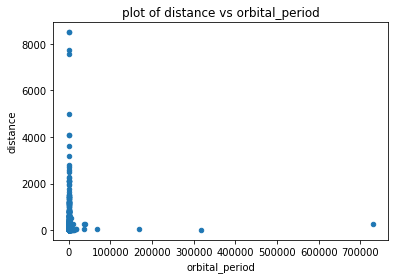

In [57]:
#create scatter plot using pandas
imp_planets.plot(x='orbital_period', y= 'distance', kind='scatter', title='plot of distance vs orbital_period');

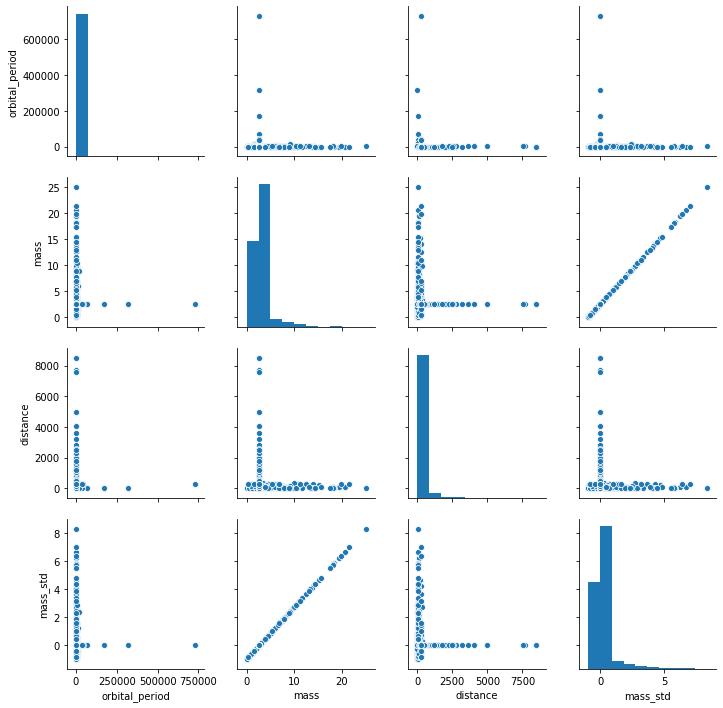

In [59]:
#pairplot using seaborn
sns.pairplot(imp_planets, vars = ['orbital_period', 'mass', 'distance', 'mass_std'])

# What have we learned?
1. General functions to get an understanding of the dataset
2. Select functions
3. Filter functions
4. Mutate functions
    - `Assign`
5. `Transform` and `Apply`
5. Groupby and summarise functions
6. Aggregation functions
7. Joining functions
8. Plotting functions

Good luck with your data science endeavors using Python!